<a href="https://colab.research.google.com/github/Dusein/MachineLearningTask/blob/main/7thWeekTask/Copy_of_Worksheet_of_7_XGBoost_data_melb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learn on how to build and optimize model with **gradient boosting.**

#Introduction
By definition, **ensemble methods** combine the predictions of several models (e.g., several trees, in the case of random forest).

Now, we'll learn about another ensemble method called gradient boosting.

#Difference of Decision Tree, Random Forest, and XGBoost

1. Decision Tree:
A decision tree is a simple and interpretable model that recursively splits the data into subsets based on the feature values. It forms a tree-like structure where each internal node represents a test on a feature, each branch represents the outcome of that test, and each leaf node represents the final prediction. The decision tree makes binary decisions at each node to split the data. It is prone to overfitting, especially when the tree becomes deep, capturing noise and leading to poor generalization on unseen data.

2. Random Forest:
Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions through voting (for classification) or averaging (for regression). Each decision tree is trained on a random subset of the data (bootstrap sample) and a random subset of the features. This randomness reduces overfitting and increases the model's ability to generalize to new data.

3. XGBoost (Extreme Gradient Boosting):
XGBoost is an optimized implementation of the Gradient Boosting algorithm. It creates an ensemble of weak learners (usually shallow decision trees) sequentially, where each new model corrects the errors made by the previous one. XGBoost uses a gradient-based optimization algorithm to minimize a loss function while adding new trees to the ensemble. It also includes regularization terms to control overfitting and speed up the training process. XGBoost is known for its high performance, scalability, and efficiency, making it popular in various machine learning competitions and real-world applications.
**XGBoost** is an implementation of gradient boosting with several additional features focused on perfmance and speed. The final result of an XGBoost model is a weighted sum of the predictions made by all the individual trees in the sequence. The contribution of each tree is adjusted during training based on how well it reduces the overall error.


Note:

* Regularization (penyederhanaan): XGBoost introduces regularization terms to control overfitting during the training process. Regularization helps prevent the model from becoming too complex and ensures better generalization to unseen data.


#Gradient Boosting

**Gradient boosting** is a method that goes through cycles to iteratively add models into an ensemble (setelan).

It begins by initializing the ensemble with a single model, whose predictions can be pretty naive. (Even if its predictions are wildly inaccurate, subsequent (kemudian) additions to the ensemble will address those errors.)

Then, we start the cycle:
1. First, we use the current ensemble to generate predictions for each observation in the dataset. To make a prediction, we **add the predictions from all models** in the ensemble.
2. These predictions are used to calculate a loss function (like mean squared error, for instance).
3. Then, we use the loss function to fit a new model that will be added to the ensemble. Specifically, we determine model parameters so that adding this new model to the ensemble will reduce the loss.
4. Finally, we add the new model to ensemble, and ...
5. Repeat!

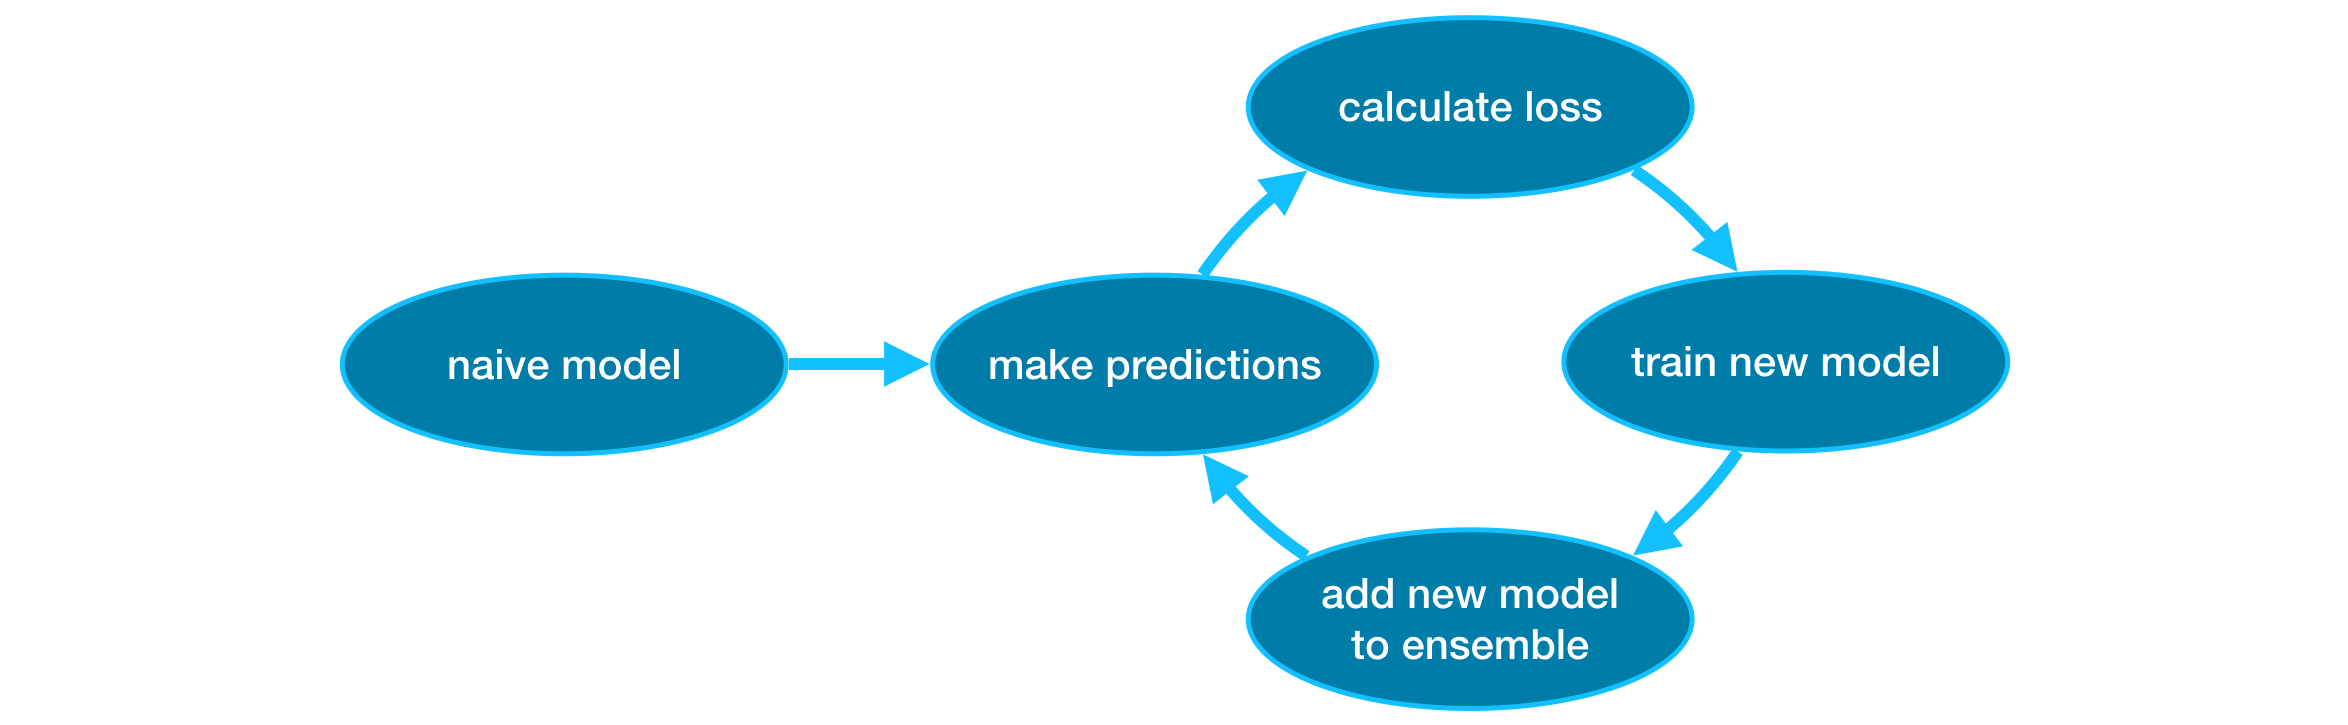

#Example
We begin by loading the training and validation data in X_train, X_valid, y_train, y_valid.

**Prompt:**

Write a code cell to mount Google Drive in Colab.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Prompt:**

Write a code cell to read a CSV file from Google Drive into a DataFrame.

In [2]:
import pandas as pd

# Ganti 'your_file_path' dengan path sebenarnya ke file CSV Anda di Google Drive
file_path = '/content/drive/My Drive/Dataset/melb_data.csv'

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari DataFrame
print(df.head())


       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0     

**Prompt:**

Write a code cell to select a subset of predictors ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt'] and set the target variable ['Price'] from the DataFrame.

In [3]:
# Memilih subset dari prediktor
predictors = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']

# Menentukan target variabel
target = 'Price'

# Membuat DataFrame untuk prediktor
X = df[predictors]

# Membuat Series untuk target
y = df[target]

# Menampilkan beberapa baris pertama dari prediktor dan target
print("Predictors (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())


Predictors (X):
   Rooms  Distance  Landsize  BuildingArea  YearBuilt
0      2       2.5     202.0           NaN        NaN
1      2       2.5     156.0          79.0     1900.0
2      3       2.5     134.0         150.0     1900.0
3      3       2.5      94.0           NaN        NaN
4      4       2.5     120.0         142.0     2014.0

Target (y):
0    1480000.0
1    1035000.0
2    1465000.0
3     850000.0
4    1600000.0
Name: Price, dtype: float64


**Prompt:**

Write a code cell to split the data into training and validation

In [4]:
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi data latih dan data validasi
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran dataset hasil pemisahan
print("Ukuran data latih (X_train):", X_train.shape)
print("Ukuran data validasi (X_valid):", X_valid.shape)
print("Ukuran target latih (y_train):", y_train.shape)
print("Ukuran target validasi (y_valid):", y_valid.shape)


Ukuran data latih (X_train): (10864, 5)
Ukuran data validasi (X_valid): (2716, 5)
Ukuran target latih (y_train): (10864,)
Ukuran target validasi (y_valid): (2716,)


In the next code cell, we import the scikit-learn API for XGBoost (`xgboost.XGBRegressor`). As you'll see in the output, the `XGBRegressor` class has many tunable parameters.


**Prompt:**

Write a code cell to train the model using XGBoost, and print the mean absolute error on the validation set.

In [25]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Membuat model XGBoost
model = XGBRegressor(random_state=42)

# Melatih model pada data latih
model.fit(X_train, y_train)

# Membuat prediksi pada data validasi
y_pred = model.predict(X_valid)

# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_valid, y_pred)

# Menampilkan MAE
print("Mean Absolute Error pada data validasi:", mae)


Mean Absolute Error pada data validasi: 230850.8424498343


We also make predictions and evaluate the model.

#Parameter Tuning
XGBoost has a few parameters that can dramatically affect accuracy and training speed. The first parameters you should understand are:

`n_estimators`
Specifies how many times to go through the modeling cycle described above. It is equal to the number of models that we include in the ensemble.
* Too low a value causes underfitting, which leads to inaccurate predictions on both training data and test data.
* Too high a value causes overfitting, which causes accurate predictions on training data, but inaccurate predictions on test data (which is what we care about).

Typical values range from 100-1000, though this depends a lot on the `learning_rate` parameter discussed below.

Here is the code to set the number of models in the ensemble:

**Prompt:**

Write a code cell to create another XGBRegressor with 500 estimators, train it, and print the mean absolute error on the validation set.

In [6]:
# Membuat model XGBoost dengan 500 estimators
model_500 = XGBRegressor(n_estimators=500, random_state=42)

# Melatih model pada data latih
model_500.fit(X_train, y_train)

# Membuat prediksi pada data validasi
y_pred_500 = model_500.predict(X_valid)

# Menghitung Mean Absolute Error (MAE)
mae_500 = mean_absolute_error(y_valid, y_pred_500)

# Menampilkan MAE
print("Mean Absolute Error pada data validasi dengan 500 estimators:", mae_500)


Mean Absolute Error pada data validasi dengan 500 estimators: 243749.46732326952


The MAE result of the model with n_estimators set to 500 turned out to be greater than the default value of n_estimators, which is 100.

The MAE (Mean Absolute Error) of the model with an n_estimators value of 110 turns out to be smaller than the default n_estimators value of 100, as well as n_estimators with a value of 500.

`early_stopping_rounds`
offers a way to automatically find the ideal value for `n_estimators`. Early stopping causes the model to stop iterating when the validation score stop improving, even if we aren't the hard stop for `n_estimators`. It's smart to set a high value for `n_estimators` and then use `early_stopping_rounds` to find the optimal time to stop iterating.

Since random chance sometimes causes a single round where validation scores don't improve, you need to specify a number for how many rounds of straight deterioration (keburukan) to allow before stopping. Setting `early_stopping_rounds=5` is a reasonable choice. In this case, we stop after 5 straight rounds of deteriorating validation scores.

When using `early_stopping_rounds`, you also need to set aside some data for calculating the validation scores. This is done by setting the `eval_set` parameter.

We can modify the example above to include early stopping.

---
Note:

* In the context of training machine learning models, "deteriorating" refers to a situation where the performance of the model on a validation dataset worsens over consecutive iterations during the training process. Typically, we monitor a metric (such as accuracy, mean squared error, etc.) on the validation dataset to evaluate the model's performance.

* In the given code, verbose=False is an argument passed to the fit method of the XGBRegressor model. Setting verbose to False means that during the training process, the model will not produce any output or progress messages. It will train silently without displaying information about each boosting round.

`n_jobs`

On larger datasets where runtime is a consideration, you can use parallelism to build your model faster. It's common to set the parameter `n_jobs` equal to the number of cores on your machine. On smaller datasets, this won't help.
The resulting model won't be any better, so micro-optimizing for fitting time is typically nothing but a distraction. But, it's useful in large datasets where you would otherwise spend a long time waiting during the `fit` command.

Here's the modified example.

**Prompt:**

Write a code cell to train an XGBRegressor with a custom learning rate, 90 estimators, and early stopping rounds, and print the mean absolute error on the validation set.

In [9]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


# Inisialisasi XGBRegressor dengan learning rate kustom
model = xgb.XGBRegressor(
    learning_rate=0.05,  # Learning rate kustom
    n_estimators=90,     # Jumlah estimator
    early_stopping_rounds=10,  # Early stopping
    objective='reg:squarederror',  # Tujuan untuk regresi
    eval_metric='mae'  # Menggunakan mean absolute error sebagai metrik evaluasi
)

# Melatih model dengan data pelatihan dan set validasi untuk early stopping
model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    verbose=False
)

# Membuat prediksi pada set validasi
y_pred = model.predict(X_valid)

# Menghitung dan mencetak Mean Absolute Error pada set validasi
mae = mean_absolute_error(y_valid, y_pred)
print(f"Mean Absolute Error pada Set Validasi: {mae}")


Mean Absolute Error pada Set Validasi: 248182.02224088734


Mean Absolute Error pada Set Validasi: 248182.02224088734


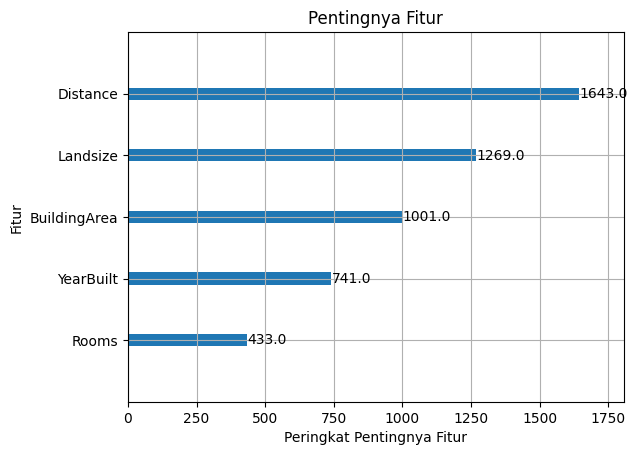

In [11]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Inisialisasi XGBRegressor dengan learning rate kustom
model = xgb.XGBRegressor(
    learning_rate=0.05,  # Learning rate kustom
    n_estimators=90,     # Jumlah estimator
    early_stopping_rounds=10,  # Early stopping
    objective='reg:squarederror',  # Tujuan untuk regresi
    eval_metric='mae'  # Menggunakan mean absolute error sebagai metrik evaluasi
)

# Melatih model dengan data pelatihan dan set validasi untuk early stopping
model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    verbose=False
)

# Membuat prediksi pada set validasi
y_pred = model.predict(X_valid)

# Menghitung dan mencetak Mean Absolute Error pada set validasi
mae = mean_absolute_error(y_valid, y_pred)
print(f"Mean Absolute Error pada Set Validasi: {mae}")

# Visualisasi Feature Importance
# Menampilkan plot importansi fitur
xgb.plot_importance(model,
                    importance_type='weight',  # Bisa diganti dengan 'weight', 'gain', atau 'cover'
                    max_num_features=10,       # Maksimal 10 fitur yang akan ditampilkan
                    title='Pentingnya Fitur',  # Judul grafik
                    xlabel='Peringkat Pentingnya Fitur',  # Label sumbu X
                    ylabel='Fitur')  # Label sumbu Y
plt.show()


Visualisasi ini menunjukkan peringkat pentingnya beberapa fitur dalam model prediksi, dengan "Distance," "Landsize," "BuildingArea," "YearBuilt," dan "Rooms" sebagai fitur yang dievaluasi. Angka di sebelah kanan setiap bar menunjukkan skor pentingnya fitur, dengan fitur "Distance" memiliki skor tertinggi (1643.0) dan "Rooms" terendah (433.0). Ini berarti "Distance" adalah fitur paling berpengaruh dalam model ini, diikuti oleh "Landsize" dan "BuildingArea," sedangkan "Rooms" memiliki pengaruh yang paling kecil.

Mean Absolute Error (MAE) pada set validasi sebesar 248182.02 menunjukkan rata-rata kesalahan absolut model dalam memprediksi nilai target pada data validasi.

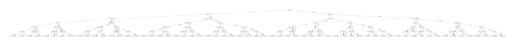

In [14]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Visualisasi Struktur Pohon (Tree)
# Menampilkan pohon pertama dari model
xgb.plot_tree(model, num_trees=0)  # num_trees=0 untuk pohon pertama (0-based index)
plt.show()

{'validation_0': OrderedDict([('mae', [448664.03171023563, 436605.7302789028, 425362.69771723123, 414718.33597201767, 404871.26544090576, 395487.67166789394, 386671.1028396539, 378541.491025405, 370780.73317838734, 363553.917548785, 357018.19999539765, 350660.7353645066, 344586.91464930045, 339270.6500828424, 333958.76442838734, 329347.4588779455, 324752.7105578056, 320586.01044734905, 316708.54919919, 312831.3512748527, 309238.12633468333, 305568.2694909794, 302646.1111929308, 300022.4483845729, 297542.9852494477, 295036.7461800442, 292918.0517074742, 290737.9515601988, 288586.71955541236, 286377.72151141387, 284853.48878175626, 283205.69382824004, 281787.03954574745, 280434.9379947533, 278753.580552743, 277473.1205011966, 276146.63544734905, 274898.79357280926, 273911.8289534242, 272847.81268409424, 271820.9714193667, 270849.0419849963, 270095.42118464655, 269263.5333440722, 268689.37302098674, 268031.8534954897, 267496.1342507364, 266639.3925464838, 266082.35214930045, 265687.117152

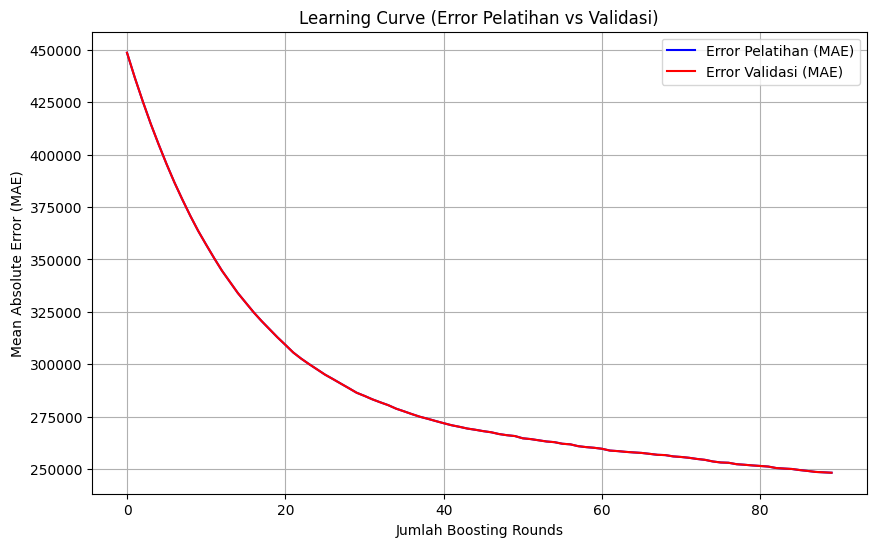

In [16]:
import matplotlib.pyplot as plt

# Mengakses hasil evaluasi
evals_result = model.evals_result()

# Menampilkan hasil evaluasi untuk memeriksa struktur
print(evals_result)  # Ini akan membantu Anda mengetahui struktur dictionary

# Misalnya, jika hanya ada 'validation_0', Anda dapat menggunakan:
train_error = evals_result['validation_0']['mae']  # MAE untuk pelatihan
valid_error = evals_result['validation_0']['mae']  # MAE untuk validasi (gunakan yang sama jika hanya satu set evaluasi)

# Membuat plot Learning Curve (Error pelatihan vs Validasi)
plt.figure(figsize=(10, 6))
plt.plot(train_error, label='Error Pelatihan (MAE)', color='blue')
plt.plot(valid_error, label='Error Validasi (MAE)', color='red')
plt.xlabel('Jumlah Boosting Rounds')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Learning Curve (Error Pelatihan vs Validasi)')
plt.legend()
plt.grid(True)
plt.show()


Visualisasi ini adalah kurva pembelajaran yang menunjukkan perubahan Mean Absolute Error (MAE) pada data pelatihan dan data validasi seiring bertambahnya jumlah boosting rounds.

Pada grafik ini:

Sumbu X menunjukkan jumlah boosting rounds yang digunakan dalam model.

Sumbu Y menunjukkan nilai MAE, yang merupakan rata-rata kesalahan absolut dari prediksi model.

Kurva yang ditampilkan menunjukkan bahwa seiring bertambahnya boosting rounds, nilai MAE pada set validasi (garis merah) terus menurun, meskipun melambat di bagian akhir. Ini menunjukkan bahwa model semakin baik dalam memprediksi nilai targetnya saat lebih banyak iterasi dilakukan, tetapi perbaikan mulai menurun setelah titik tertentu.

In [17]:
!pip install shap


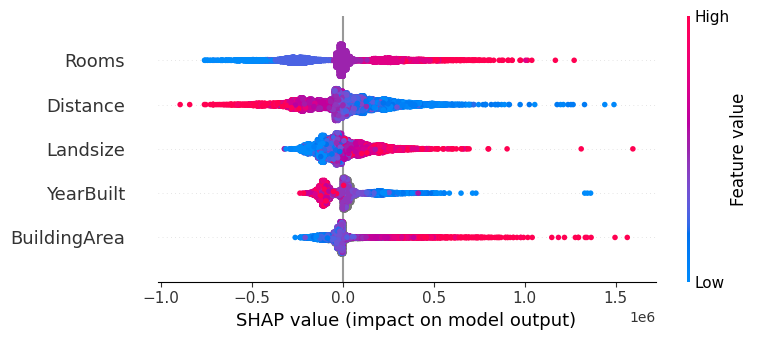

In [18]:
import shap
import xgboost as xgb
import matplotlib.pyplot as plt

# Jika model XGBoost sudah dilatih, lanjutkan di bawah ini
# Pastikan untuk mengganti 'model' dengan model yang sudah dilatih

# Menghitung SHAP values untuk data pelatihan
explainer = shap.Explainer(model)  # Membuat objek explainer untuk model XGBoost
shap_values = explainer(X_train)  # Menghitung SHAP values untuk data pelatihan

# Visualisasi SHAP summary plot
shap.summary_plot(shap_values, X_train)


Grafik ini adalah plot SHAP (SHapley Additive exPlanations), yang digunakan untuk memahami pengaruh fitur-fitur pada keluaran model prediksi secara lebih mendalam.

Pada grafik:

Sumbu Y mencantumkan fitur-fitur model, yaitu "Rooms," "Distance," "Landsize," "YearBuilt," dan "BuildingArea."

Sumbu X menunjukkan nilai SHAP, yang merepresentasikan seberapa besar dampak masing-masing fitur terhadap prediksi model (dalam unit output model).

Warna menunjukkan nilai fitur: merah berarti nilai fitur tinggi, dan biru berarti nilai fitur rendah.
Interpretasi dari grafik:

Nilai SHAP positif menunjukkan bahwa fitur tersebut meningkatkan nilai prediksi, sedangkan nilai SHAP negatif menunjukkan bahwa fitur tersebut menurunkan nilai prediksi.

Misalnya, pada fitur "Distance," semakin kecil nilai "Distance" (ditunjukkan dengan warna biru), cenderung menurunkan prediksi output. Sebaliknya, nilai "Distance" yang tinggi (merah) memiliki dampak yang lebih besar dalam meningkatkan prediksi.

"Rooms" juga mempengaruhi prediksi secara positif ketika nilainya tinggi, sedangkan nilai rendah cenderung menurunkan prediksi.
Dengan menggunakan grafik SHAP ini, kita bisa lebih memahami bagaimana setiap fitur berkontribusi pada keputusan model dalam berbagai kasus, membantu dalam interpretasi model secara transparan.

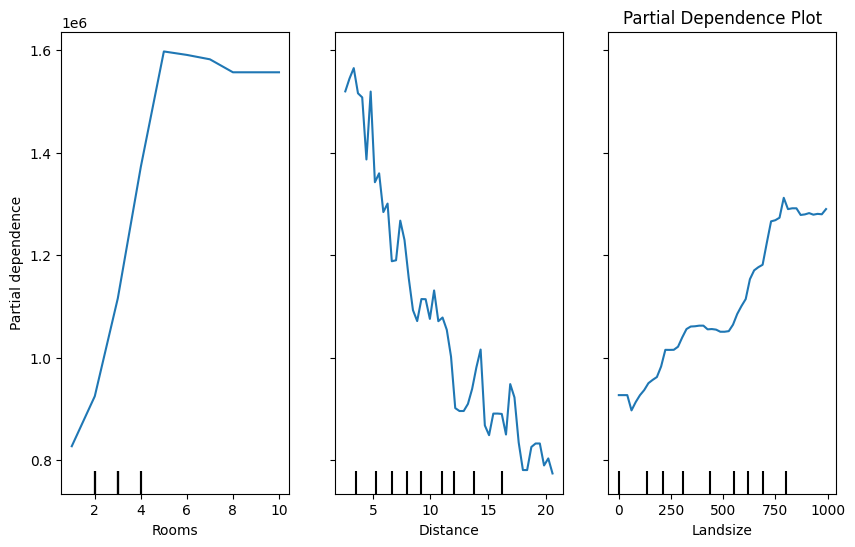

In [24]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Misalkan model Anda adalah model yang sudah dilatih
# X_train adalah data fitur pelatihan Anda

# Membuat Partial Dependence Plot untuk fitur tertentu (misalnya, 'Rooms', 'Distance', dll)
features = ['Rooms', 'Distance', 'Landsize']  # List of features

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 6))  # Ukuran plot

# Membuat Partial Dependence Plot untuk fitur yang dipilih
PartialDependenceDisplay.from_estimator(model, X_train, features=features, ax=ax, grid_resolution=50)

# Menampilkan plot
plt.title("Partial Dependence Plot")
plt.show()


Output ini menampilkan Partial Dependence Plot (PDP) untuk tiga fitur: Rooms, Distance, dan Landsize. PDP digunakan untuk memahami hubungan antara setiap fitur dan target prediksi, dengan mempertimbangkan pengaruh rata-rata fitur lainnya.

Rooms: Grafik pertama menunjukkan bahwa semakin banyak jumlah kamar, semakin tinggi prediksi target, tetapi kenaikannya mulai melambat setelah sekitar 6 kamar.

Distance: Grafik kedua menunjukkan bahwa semakin jauh properti dari titik referensi (misalnya pusat kota), prediksi target semakin menurun secara signifikan, menunjukkan hubungan negatif.

Landsize: Grafik ketiga menunjukkan bahwa semakin besar ukuran tanah, prediksi target meningkat, meskipun peningkatan tersebut terjadi secara bertahap setelah ukuran tertentu.

Secara keseluruhan, fitur Rooms dan Landsize memiliki hubungan positif dengan target, sementara Distance memiliki hubungan negatif.